#BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
# Visualizando graficamente os pontos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
# Remover a coluna de sobreviventes
df.drop(columns=['Survived'], inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

interpola√ß√£o para preencher valores nulos com base nos valores adjacentes:

In [ ]:
df['Age'].interpolate(method='linear', inplace=True)
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Preencher valores ausentes na coluna 'Fare' com a m√©dia da coluna
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

# Converter valores categ√≥ricos da coluna 'Sex' para num√©ricos
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Converter valores categ√≥ricos da coluna 'Embarked' para num√©ricos
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Preencher valores ausentes na coluna 'Cabin' com 0
df["Cabin"].fillna(0, inplace=True)

# Remover qualquer linha que ainda tenha valores ausentes
df.dropna(inplace=True)

# Reiniciar os √≠ndices do DataFrame ap√≥s a remo√ß√£o de linhas
df.reset_index(drop=True, inplace=True)

# Remover as colunas 'Name', 'Ticket', 'Cabin' e 'PassengerId' do DataFrame
df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)

Normaliza√ß√£o dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Inicializa o MinMaxScaler
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head()

Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0     1.0  0.0  0.271174  0.125    0.0  0.014151       1.0
1     0.0  1.0  0.472229  0.125    0.0  0.139136       0.0
2     1.0  1.0  0.321438  0.000    0.0  0.015469       1.0
3     0.0  1.0  0.434531  0.125    0.0  0.103644       1.0
4     1.0  0.0  0.434531  0.000    0.0  0.015713       1.0

#K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


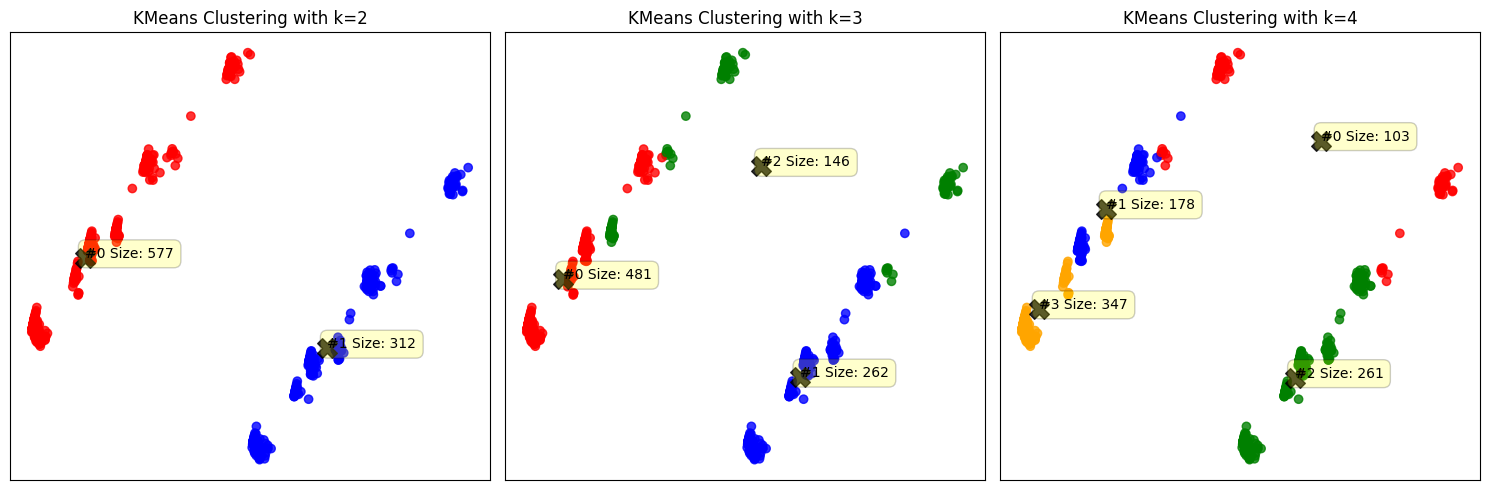

In [ ]:
k_values = [2, 3, 4]
k_colors = ['red', 'blue', 'green', 'orange', 'pink', 'purple', 'brown']

# Determine o n√∫mero de linhas e colunas com base na quantidade de k_values
num_cols = min(len(k_values), 3)
num_rows = (len(k_values) + num_cols - 1) // num_cols

# Crie uma figura e um conjunto de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
colors = np.array(k_colors)

for i, k in enumerate(k_values):
    row, col = divmod(i, num_cols)

    # Crie e ajuste o modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)

    # Reduz a dimensionalidade com PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_normalized.values)

    # Seleciona o subplot apropriado
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plota os pontos de dados e os centros dos clusters
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[kmeans.labels_], alpha=0.8)
    ax.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
               c='black', s=200, alpha=0.8, marker='X')
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    # Tamanhos dos clusters
    cluster_sizes = [np.sum(kmeans.labels_ == j) for j in range(k)]

    # Anota tamanhos dos clusters
    for cluster_id, cluster_center in enumerate(pca.transform(kmeans.cluster_centers_)):
        ax.annotate(
            f'#{cluster_id} Size: {cluster_sizes[cluster_id]}',
            xy=(cluster_center[0], cluster_center[1]),
            xycoords='data',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2)
        )

# Esconde subplots vazios
for i in range(len(k_values), num_rows * num_cols):
    row, col = divmod(i, num_cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


Este trecho de c√≥digo realiza clustering usando o algoritmo K-means para diferentes valores de
ùëò e visualiza os resultados em uma figura com m√∫ltiplos subplots. Ele reduz a dimensionalidade dos dados usando PCA para plotar os pontos de dados e os centros dos clusters em um espa√ßo bidimensional. Cada subplot mostra os clusters identificados para um valor espec√≠fico de
ùëò, com as cores representando diferentes clusters e anota√ß√µes indicando o tamanho de cada cluster. O objetivo √© comparar visualmente os resultados do clustering para diferentes valores de
ùëò.

##M√©todo do Elbow

In [ ]:
valores_k = []
square_dist = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    square_dist.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

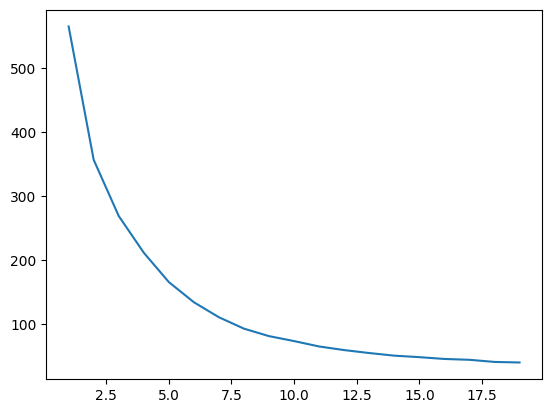

In [ ]:
# Visualizando a rela√ß√£o entre in√©rcia e K
fig, ax = plt.subplots()

ax.plot(valores_k,square_dist)

plt.show()

O m√©todo do cotovelo (elbow) √© aplicado no algoritmo de K-means para determinar o n√∫mero ideal de clusters (
ùëò). Ele envolve executar o K-means para v√°rios valores de
ùëò e calcular a soma dos erros quadr√°ticos (SSE) para cada
ùëò. Em seguida, os valores de SSE s√£o plotados em um gr√°fico, e o ponto onde a diminui√ß√£o do SSE come√ßa a se estabilizar (formando um "cotovelo") indica o n√∫mero ideal de clusters. Isso ajuda a escolher
ùëò que balanceia a qualidade do clustering e a complexidade do modelo.

## Verificando o silhouette_score para:

O m√©todo silhouette score √© utilizado para avaliar a qualidade do clustering no algoritmo K-means. Ele mede o qu√£o bem cada ponto de dados est√° agrupado em rela√ß√£o aos outros pontos do mesmo cluster e aos pontos de clusters diferentes. O score varia de -1 a 1, onde valores pr√≥ximos a 1 indicam que os pontos est√£o bem agrupados, valores pr√≥ximos a 0 indicam sobreposi√ß√£o de clusters e valores negativos indicam que os pontos podem estar no cluster errado. Aplicar o silhouette score para diferentes valores de
ùëò ajuda a determinar o n√∫mero ideal de clusters, maximizando a separa√ß√£o e coes√£o dos clusters.

### K = 2

In [ ]:
kmeans_2 = KMeans(n_clusters=2,random_state=0).fit(df_normalized)
silhouette_score(df_normalized,kmeans_2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.411963744003411

### K = 3

In [ ]:
kmeans_3 = KMeans(n_clusters=3,random_state=0).fit(df_normalized)
silhouette_score(df_normalized,kmeans_3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.43894063906496444

##Verificando o Davies-Bouldin (DB) score para:

O m√©todo Davies-Bouldin √© usado para avaliar a qualidade do clustering no algoritmo K-means. Ele calcula uma m√©trica baseada na m√©dia da similaridade entre cada cluster e o cluster mais similar a ele. A similaridade √© uma medida de dispers√£o dentro do cluster e a dist√¢ncia entre os clusters. O √≠ndice Davies-Bouldin varia de 0 a ‚àû, onde valores mais baixos indicam clusters mais compactos e bem separados. Aplicar o √≠ndice Davies-Bouldin para diferentes valores de
ùëò ajuda a determinar o n√∫mero ideal de clusters, minimizando a similaridade entre clusters diferentes e maximizando a coes√£o dentro dos clusters.

### K = 2

In [ ]:
kmeans_2 = KMeans(n_clusters=2,random_state=0).fit(df_normalized)
davies_bouldin_score(df_normalized,kmeans_2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1.1798884860474979

### K = 3

In [ ]:
kmeans_3 = KMeans(n_clusters=3,random_state=0).fit(df_normalized)
davies_bouldin_score(df_normalized,kmeans_3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1.0926534064633713

##Verificando Calinski Harabasz score para:

O m√©todo Calinski-Harabasz, tamb√©m conhecido como √≠ndice de vari√¢ncia, √© utilizado para avaliar a qualidade do clustering no algoritmo K-means. Ele calcula a raz√£o entre a soma da dispers√£o entre clusters e a soma da dispers√£o dentro dos clusters, considerando o n√∫mero de clusters e o n√∫mero de pontos de dados. Valores mais altos do √≠ndice indicam uma melhor separa√ß√£o entre os clusters e uma maior coes√£o dentro dos clusters. Aplicar o √≠ndice Calinski-Harabasz para diferentes valores de
ùëò ajuda a determinar o n√∫mero ideal de clusters, maximizando a separa√ß√£o entre clusters e a coes√£o dentro dos mesmos.

### K = 2

In [ ]:
kmeans_2 = KMeans(n_clusters=2,random_state=0).fit(df_normalized)
calinski_harabasz_score(df_normalized,kmeans_2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


518.4155784816812

### K = 3

In [ ]:
kmeans_3 = KMeans(n_clusters=3,random_state=0).fit(df_normalized)
calinski_harabasz_score(df_normalized,kmeans_3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


488.16929380513506

##Analisando graficamente:

###Silhouette score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

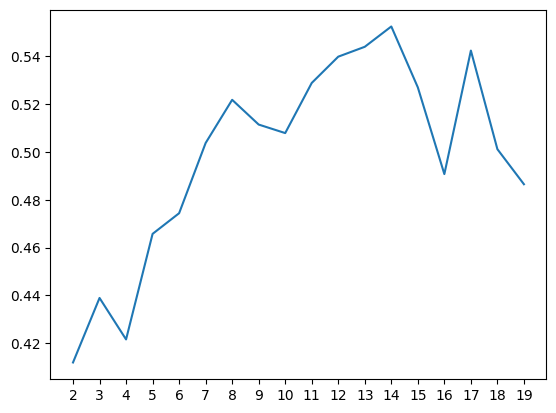

<Figure size 2000x1500 with 0 Axes>

In [ ]:
valores_k = []
s = []

for i in range(2,20): #N√£o aceita o valor 1
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    s.append(silhouette_score(df_normalized,kmeans.labels_))

#visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,s)
# Ajusta o localizador do eixo X para mostrar de 1 em 1
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.figure(figsize=(20, 15))
plt.show()

###Davies-Bouldin (DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

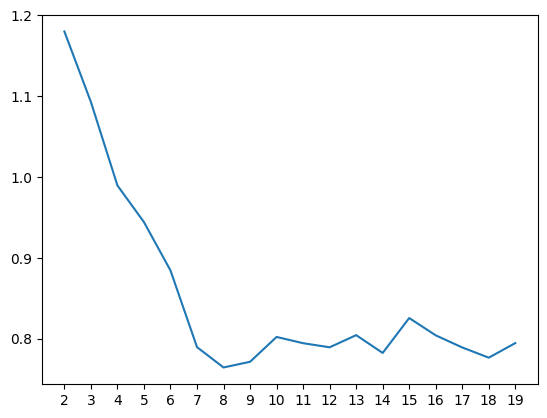

<Figure size 2000x1500 with 0 Axes>

In [ ]:
valores_k = []
s = []

for i in range(2,20): #N√£o aceita o valor 1
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    s.append(davies_bouldin_score(df_normalized,kmeans.labels_))

#visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,s)
# Ajusta o localizador do eixo X para mostrar de 1 em 1
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.figure(figsize=(20, 15))
plt.show()

### Calinski-Harabasz (CH) score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

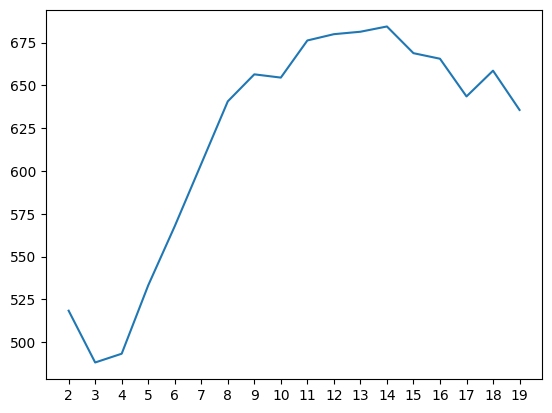

<Figure size 2000x1500 with 0 Axes>

In [ ]:
valores_k = []
s = []

for i in range(2,20): #N√£o aceita o valor 1
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    s.append(calinski_harabasz_score(df_normalized,kmeans.labels_))

#visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,s)
# Ajusta o localizador do eixo X para mostrar de 1 em 1
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.figure(figsize=(20, 15))
plt.show()

##Observa√ß√µes:

De acordo com a an√°lise acima, o n√∫mero ideal aproximado para K (clusters) seria de 5, pois √© o valor onde tanto o m√©todo Calinski-Harabasz e Silhouette score tem um valor alto, quanto Davies-Bouldin e o m√©todo de Elbow tem um valor baixo. Sendo o cen√°rio ideal

#DBSCAN

N√∫mero estimado de clusters: 34
N√∫mero estimado de pontos de ru√≠do: 247


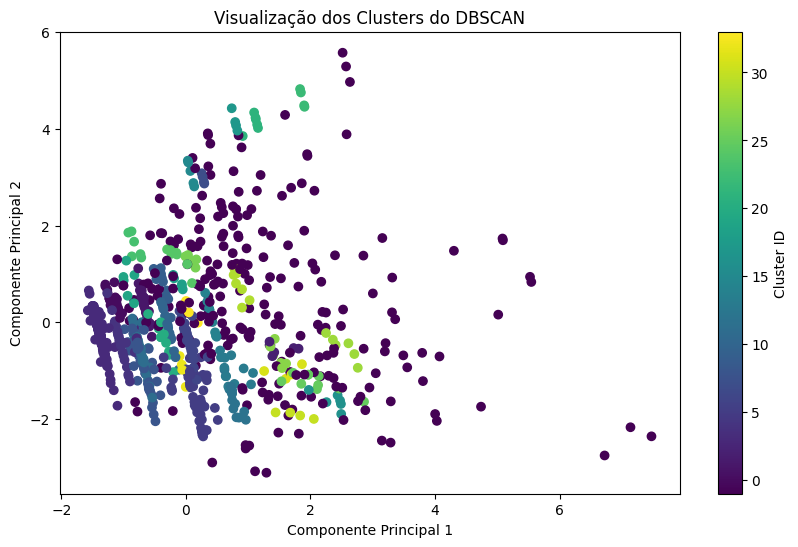

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

trainData_for_dbscan = df_normalized

scaler = StandardScaler()
trainData_scaled = scaler.fit_transform(trainData_for_dbscan)

eps_value = 0.8
min_samples_value = 4

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(trainData_scaled)

df['cluster'] = clusters

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'N√∫mero estimado de clusters: {n_clusters_}')
print(f'N√∫mero estimado de pontos de ru√≠do: {n_noise_}')

pca = PCA(n_components=2)
trainData_pca = pca.fit_transform(trainData_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(trainData_pca[:, 0], trainData_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Visualiza√ß√£o dos Clusters do DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster ID')
plt.show()


O m√©todo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) √© um algoritmo de clustering que identifica clusters de forma baseada na densidade dos dados. Ele funciona agrupando pontos que est√£o pr√≥ximos uns dos outros, considerando uma dist√¢ncia m√≠nima (ùúñ) e um n√∫mero m√≠nimo de pontos (ùëöùëñùëõùëÉùë°ùë†) para formar um cluster. Pontos em regi√µes de baixa densidade s√£o considerados como ru√≠do. DBSCAN √© particularmente √∫til para descobrir clusters de forma arbitr√°ria e √© robusto a ru√≠dos e outliers, sem necessidade de especificar previamente o n√∫mero de clusters.

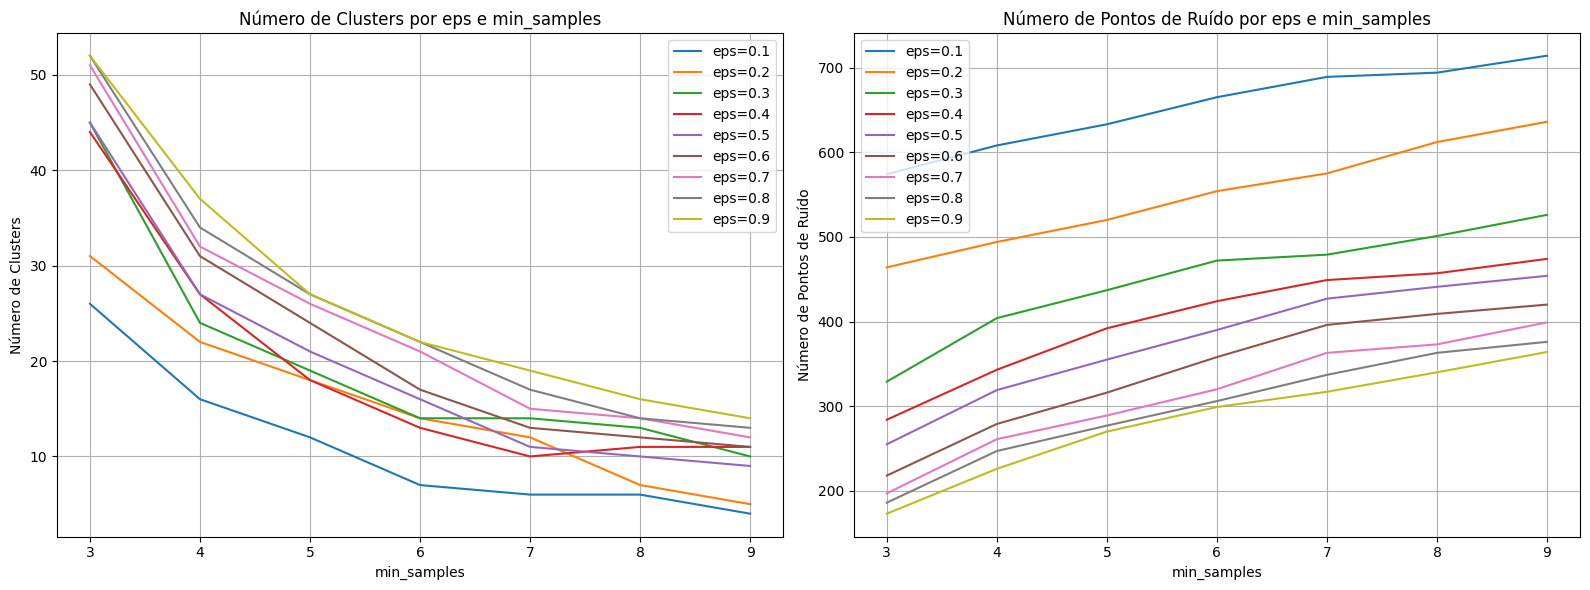

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Definir os intervalos de par√¢metros para DBSCAN
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(3, 10)

# Listas para armazenar o n√∫mero de clusters e pontos de ru√≠do
clusters_list = []
noise_list = []

# Iterar sobre cada valor de eps no intervalo definido
for eps in eps_range:
    clusters_row = []  # Lista tempor√°ria para armazenar resultados de clusters para um valor espec√≠fico de eps
    noise_row = []     # Lista tempor√°ria para armazenar resultados de ru√≠do para um valor espec√≠fico de eps
    for min_samples in min_samples_range:
        # Inicializar o modelo DBSCAN com os par√¢metros atuais
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        # Ajustar o modelo aos dados e obter os r√≥tulos dos clusters
        clusters = dbscan.fit_predict(trainData_scaled)
        # Calcular o n√∫mero de clusters (excluindo ru√≠do)
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
        # Contar o n√∫mero de pontos rotulados como ru√≠do
        n_noise_ = list(clusters).count(-1)

        # Armazenar os resultados nas listas tempor√°rias
        clusters_row.append(n_clusters_)
        noise_row.append(n_noise_)

    # Adicionar os resultados das listas tempor√°rias √†s listas principais
    clusters_list.append(clusters_row)
    noise_list.append(noise_row)

# Converter as listas para arrays numpy para facilitar a manipula√ß√£o dos dados
clusters_array = np.array(clusters_list)
noise_array = np.array(noise_list)

# Criar uma figura e subplots para visualizar os resultados
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro subplot: N√∫mero de clusters
ax1 = axes[0]
for i, eps in enumerate(eps_range):
    ax1.plot(min_samples_range, clusters_array[i, :], label=f'eps={eps:.1f}')
ax1.set_xlabel('min_samples')
ax1.set_ylabel('N√∫mero de Clusters')
ax1.set_title('N√∫mero de Clusters por eps e min_samples')
ax1.legend()
ax1.grid(True)

# Segundo subplot: N√∫mero de pontos de ru√≠do
ax2 = axes[1]
for i, eps in enumerate(eps_range):
    ax2.plot(min_samples_range, noise_array[i, :], label=f'eps={eps:.1f}')
ax2.set_xlabel('min_samples')
ax2.set_ylabel('N√∫mero de Pontos de Ru√≠do')
ax2.set_title('N√∫mero de Pontos de Ru√≠do por eps e min_samples')
ax2.legend()
ax2.grid(True)

# Ajustar layout dos subplots para evitar sobreposi√ß√£o
plt.tight_layout()
plt.show()


realiza uma an√°lise de sensibilidade dos par√¢metros do algoritmo DBSCAN (ùúñ e ùëöùëñùëõ_ùë†ùëéùëöùëùùëôùëíùë†) para determinar como eles impactam a forma√ß√£o de clusters e a identifica√ß√£o de ru√≠dos. Para cada combina√ß√£o de ùúñ e ùëöùëñùëõ_ùë†ùëéùëöùëùùëôùëíùë†, ele ajusta o modelo DBSCAN aos dados, calcula o n√∫mero de clusters formados e a quantidade de pontos rotulados como ru√≠do. Os resultados s√£o visualizados em gr√°ficos que mostram essas m√©tricas em fun√ß√£o de ùëöùëñùëõ_ùë†ùëéùëöùëùùëôùëíùë† para diferentes valores de
ùúñ. Essa an√°lise ajuda a escolher os melhores par√¢metros para DBSCAN, otimizando a detec√ß√£o de clusters relevantes e minimizando a quantidade de ru√≠do, o que √© crucial para obter resultados de clustering mais precisos e √∫teis

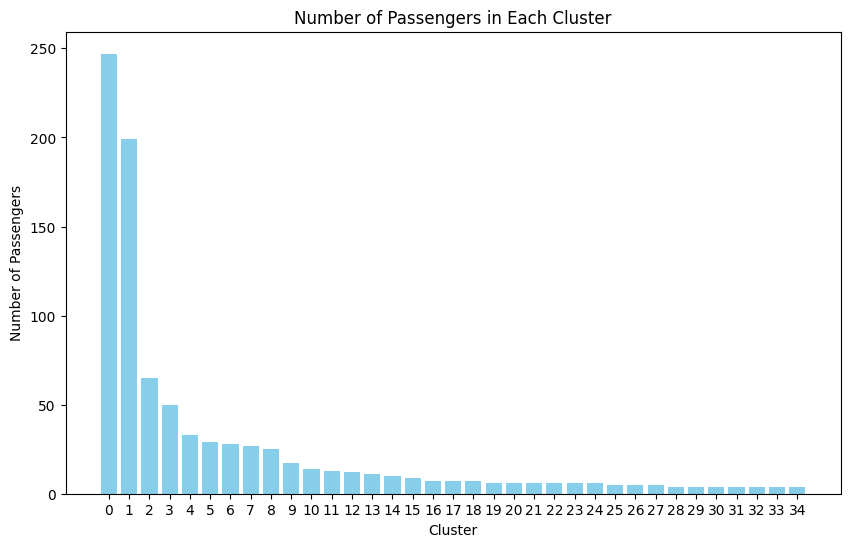

In [ ]:
cluster_counts = df['cluster'].value_counts()
cluster_numbers = range(0,len(cluster_counts))
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_numbers, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers in Each Cluster')
plt.xticks(cluster_numbers)
plt.show()

In [ ]:
cluster_summary = df.groupby('cluster').describe()
cluster_summary

Pclass                                                 Sex            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
cluster                                                                        
-1       247.0  2.016194  0.887893  1.0  1.0  2.0  3.0  3.0  247.0  0.611336   
 0        17.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   17.0  0.000000   
 1        29.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   29.0  1.000000   
 2         7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    7.0  1.000000   
 3       199.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0  199.0  0.000000   
 4        27.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   27.0  0.000000   
 5        50.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   50.0  0.000000   
 6        28.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   28.0  1.000000   
 7         4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  0.000000   
 8        65.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   65.0  0.000000   
 9        13.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   13.0  1.000000   
 10       25.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   25.0  1.000000   
 11       33.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   33.0  0.000000   
 12       12.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   12.0  0.000000   
 13       14.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   14.0  0.000000   
 14        9.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    9.0  1.000000   
 15        5.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    5.0  0.000000   
 16        6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    6.0  1.000000   
 17        4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  0.000000   
 18        5.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    5.0  0.000000   
 19        6.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    6.0  0.000000   
 20       11.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   11.0  0.000000   
 21        6.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    6.0  1.000000   
 22        4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  0.000000   
 23        6.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    6.0  0.000000   
 24        7.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    7.0  0.000000   
 25       10.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   10.0  1.000000   
 26        5.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    5.0  1.000000   
 27        6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    6.0  1.000000   
 28        6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    6.0  1.000000   
 29        7.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    7.0  1.000000   
 30        4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    4.0  0.000000   
 31        4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    4.0  0.000000   
 32        4.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    4.0  0.000000   
 33        4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  1.000000   

         ...        Fare           Embarked                                \
         ...         75%       max    count      mean       std  min  25%   
cluster  ...                                                                
-1       ...   77.008350  512.3292    247.0  1.251012  0.933647  0.0  0.0   
 0       ...   16.100000   19.9667     17.0  2.000000  0.000000  2.0  2.0   
 1       ...    8.683300   12.4750     29.0  2.000000  0.000000  2.0  2.0   
 2       ...   69.687500   90.0000      7.0  2.000000  0.000000  2.0  2.0   
 3       ...    8.050000   56.4958    199.0  2.000000  0.000000  2.0  2.0   
 4       ...    7.750000   24.1500     27.0  1.000000  0.000000  1.0  1.0   
 5       ...   33.890600   52.0000     50.0  2.000000  0.000000  2.0  2.0   
 6       ...   13.000000   33.0000     28.0  2.000000  0.000000  2.0  2.0   
 7       ...   29.125000   29.1250      4.0  1.000000  0.000000  1.0  1.0   
 8       ...   13.000000   26.0000     65.0